### **本节介绍图像平滑（图像模糊）**

主要目标：  
（1）学习使用不同的**低通滤波器**对图像进行模糊  
（2）使用**自定义**的滤波器对图像进行**卷积**（2D 卷积）  

In [1]:
# 导入包
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 构建展示函数
def show(img,title = 'Test'):
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

**一，2D 卷积**

与以为信号一样，我们也可以对 2D 图像实施低通滤波（LPF），高通滤波（HPF）等。  
**LPF 帮助我们去除噪音，模糊图像。**  
**HPF 帮助我们找到图像的边缘。**  
OpenCV 提供的函数 cv.filter2D() 可以让我们对一幅图像进行卷积操作。

下例子自定义的卷积核为
$ k = \frac{1}{25} \times \begin{bmatrix} 1&1&1&1&1 \\
1&1&1&1&1 \\
1&1&1&1&1 \\
1&1&1&1&1 \\
1&1&1&1&1 \\
\end{bmatrix} $

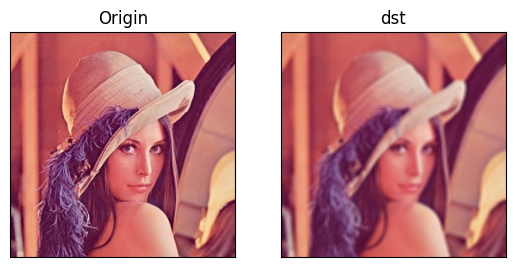

In [7]:
# 下面以自定义2D卷积为例

img = cv2.imread('images/lena.jpg')

# 为了适用plt的RGB解读模式，将图像由BGR转换到RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 自定义numpy卷积核
kernel = np.ones((5,5),np.float32)/25

# 进行图像卷积模糊操作
# -1为图像深度，目前未知作用
dst = cv2.filter2D(img,-1,kernel)

img_stack = [img,dst]
titles = ['Origin','dst']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img_stack[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 显然模糊了

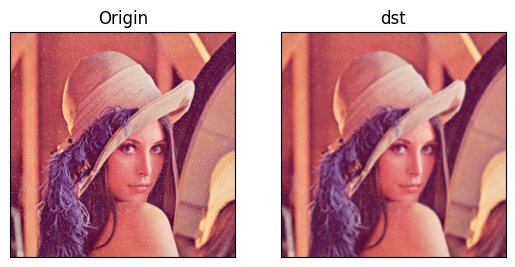

In [8]:
# 以存在噪声点的lena图像为例子展示LPF的降噪作用

img = cv2.imread('images/lenaNoise.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 自定义numpy卷积核
kernel = np.ones((5,5),np.float32)/25

# 进行图像卷积模糊操作
# -1为图像深度，目前未知作用
dst = cv2.filter2D(img,-1,kernel)

img_stack = [img,dst]
titles = ['Origin','dst']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img_stack[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 发现噪声点减少了，但是不明显，因为自定义的卷积核平滑效果可能不合适

**二，opecv中的内置图像平滑函数**

（1）**均值滤波**： 
 
这是由一个归一化卷积框完成的。他只是用卷积框覆盖区域所有像素的平均值来代替中心元素。  
可以使用函数 **cv2.blur()** 和 **cv2.boxFilter()** 来完这个任务。

上面两个函数基本一样，后者可以选择**归一化**，具体目前不清楚  
这两个函数指定的卷积核为：

$ k = \frac{1}{n} \times
\begin{bmatrix} 1&1&...&1\\1&1&...&1\\...&...&...&...\\1&1&...&1\\ \end{bmatrix} $

下面演示blur的用法：

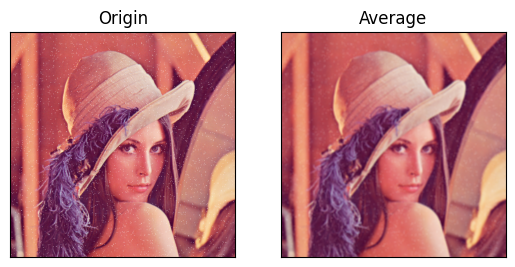

In [13]:
# 读取含噪声的lena
img = cv2.imread('images/lenaNoise.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 进行图像均值滤波操作
# 第二个参数指定均值卷积核的大小
dst = cv2.blur(img,(5,5))

img_stack = [img,dst]
titles = ['Origin','Average']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img_stack[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


（2）**高斯滤波**  

高斯滤波的卷积核不在全为1，而是有权重比的，如图

$ k = \frac{1}{115} \times
\begin{bmatrix}
2&4&5&4&2\\
4&9&12&9&4\\
5&12&15&12&5\\
4&9&12&9&4\\
2&4&5&4&2\\ \end{bmatrix} $

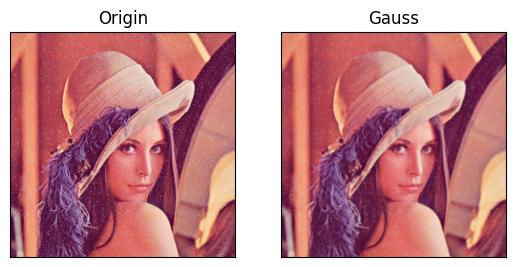

In [12]:
# 读取含噪声的lena
img = cv2.imread('images/lenaNoise.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 进行图像高斯滤波操作
#0 是指根据窗口大小（5,5）来计算高斯函数标准差，具体不清楚
dst = cv2.GaussianBlur(img,(5,5),0)

img_stack = [img,dst]
titles = ['Origin','Gauss']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img_stack[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

（3）**中值滤波**  

顾名思义，即取卷积核内的中位数

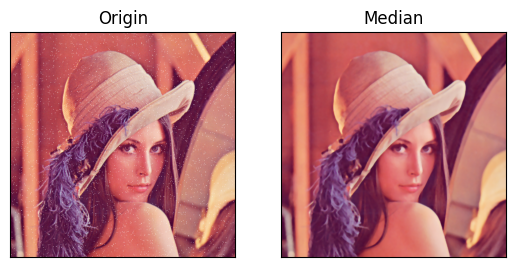

In [16]:
# 读取含噪声的lena
img = cv2.imread('images/lenaNoise.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 进行图像中值滤波操作
# 中值的第二个参数为一个整型奇数
dst = cv2.medianBlur(img,5)

img_stack = [img,dst]
titles = ['Origin','Median']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img_stack[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 对于这幅图，效果最好！

（4）**双边滤波**

函数 **cv2.bilateralFilter()** 能在保持边界清晰的情况下有效的去除噪  
音。但是这种操作与其他滤波器相比会比较慢。我们已经知道高斯滤波器是求  
中心点邻近区域像素的高斯加权平均值。这种高斯滤波器只考虑像素之间的空  
间关系，而不会考虑像素值之间的关系（像素的相似度）。所以这种方法不会考  
虑一个像素是否位于边界。因此边界也会别模糊掉，而这正不是我们想要。  
双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重。空间高斯函  
数确保只有邻近区域的像素对中心点有影响，灰度值相似性高斯函数确保只有  
与中心像素灰度值相近的才会被用来做模糊运算。所以这种方法会确保边界不  
会被模糊掉，因为边界处的灰度值变化比较大。  

双边滤波效果展示图：
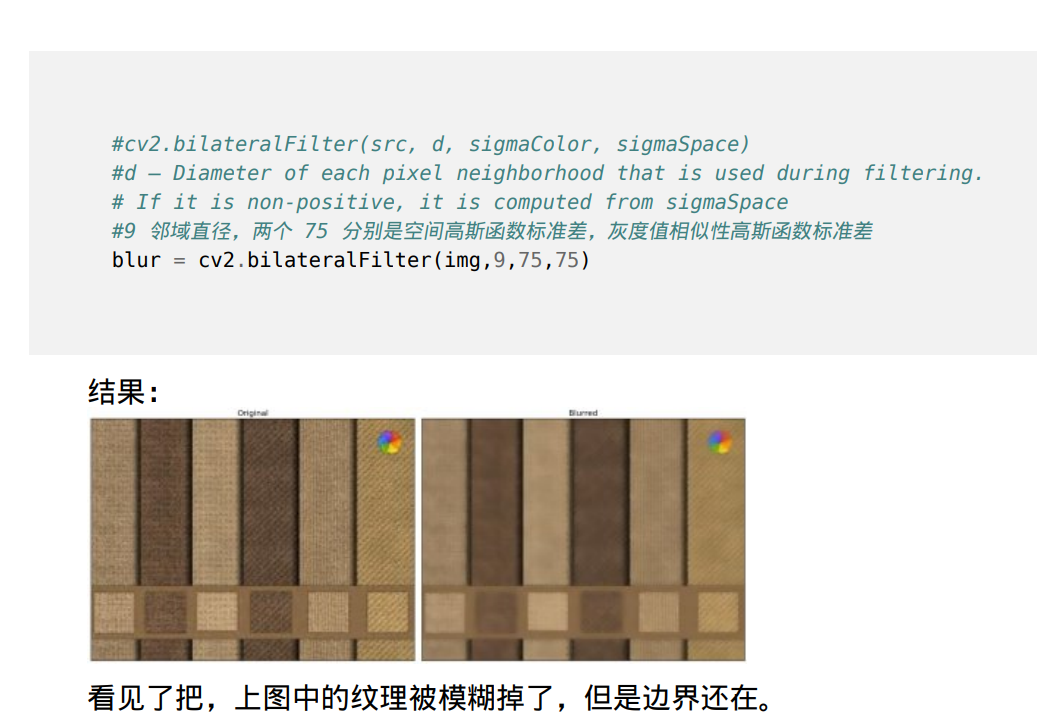

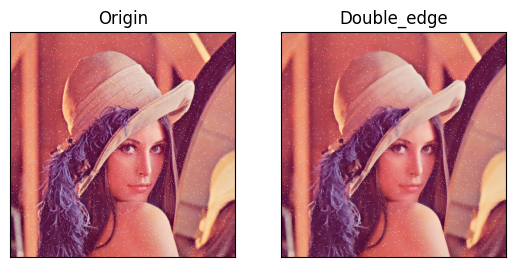

In [17]:
# 读取含噪声的lena
img = cv2.imread('images/lenaNoise.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 进行图像双边滤波操作
#9 邻域直径，两个 75 分别是空间高斯函数标准差，灰度值相似性高斯函数标准差，具体不清楚
dst = cv2.bilateralFilter(img,9,75,75)

img_stack = [img,dst]
titles = ['Origin','Double_edge']
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(img_stack[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 效果看不出来